In [1]:
import requests
import zipfile
import os

# URL of the dataset
url = 'https://www.dropbox.com/scl/fi/u2w4eoeiksyae1pn0di6d/IndianSignLanguage.zip?rlkey=38ztp9zkqvhdvusoeet3a9qex&dl=1'  # Set dl=1 to download directly

# Download the file
response = requests.get(url)
zip_path = 'IndianSignLanguage.zip'

# Save the ZIP file
with open(zip_path, 'wb') as f:
    f.write(response.content)

print("Dataset downloaded successfully.")

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('IndianSignLanguage')

print("Dataset extracted successfully.")

Dataset downloaded successfully.
Dataset extracted successfully.


Metadata Summary:
Total number of images: 42000
Number of classes: 35
Class distribution:
   ClassID  NumImages
0        R       1200
1        U       1200
2        9       1200
3        7       1200
4        I       1200
5        N       1200
6        G       1200
7        6       1200
8        Z       1200
9        1       1200
10       8       1200
11       T       1200
12       S       1200
13       A       1200
14       F       1200
15       O       1200
16       H       1200
17       M       1200
18       J       1200
19       C       1200
20       D       1200
21       V       1200
22       Q       1200
23       4       1200
24       X       1200
25       3       1200
26       E       1200
27       B       1200
28       K       1200
29       L       1200
30       2       1200
31       Y       1200
32       5       1200
33       P       1200
34       W       1200



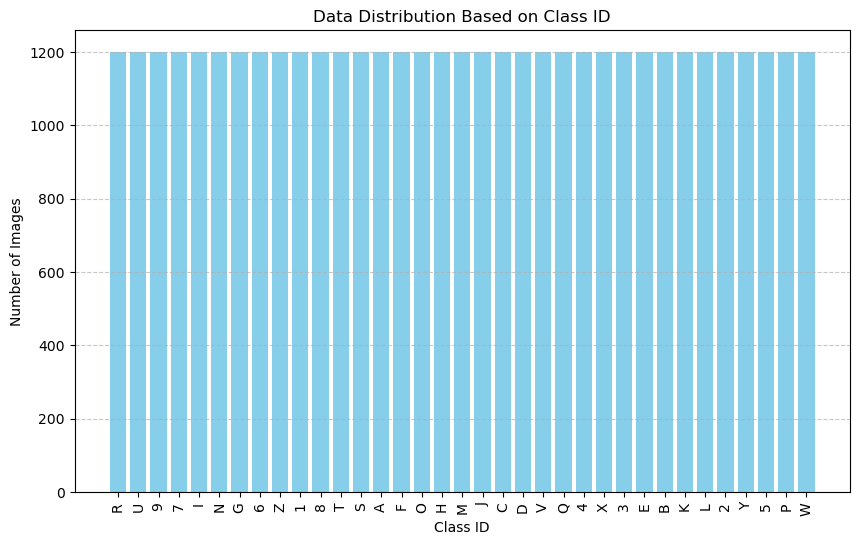

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to load the dataset and extract metadata
def extract_metadata(dataset_path):
    data = []
    class_distribution = {}

    # Loop through each class directory
    for class_dir in os.listdir(dataset_path):
        if class_dir.startswith('.'):
            continue

        # Use the directory name as the class label
        class_id = class_dir
        class_images = os.listdir(os.path.join(dataset_path, class_dir))

        # Count the number of images in the class directory
        class_distribution[class_id] = len(class_images)
        data.append((class_id, len(class_images)))

    # Convert data to DataFrame for easier manipulation and visualization
    df = pd.DataFrame(data, columns=['ClassID', 'NumImages'])

    # Calculate total number of images
    total_images = df['NumImages'].sum()

    # Display metadata
    print("Metadata Summary:")
    print("=================")
    print("Total number of images:", total_images)
    print("Number of classes:", len(df))
    print("Class distribution:")
    print(df)
    print("")

    return df, class_distribution

# Path to the dataset
dataset_path = "IndianSignLanguage/data"

# Extract metadata
metadata_df, class_distribution = extract_metadata(dataset_path)

# Plot the data distribution based on class ID
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Data Distribution Based on Class ID')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many classes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Exploratory Analysis:
Metadata Summary:
Total number of images: 42000
Number of classes: 35
Class distribution:
   ClassID  NumImages
0        R       1200
1        U       1200
2        9       1200
3        7       1200
4        I       1200
5        N       1200
6        G       1200
7        6       1200
8        Z       1200
9        1       1200
10       8       1200
11       T       1200
12       S       1200
13       A       1200
14       F       1200
15       O       1200
16       H       1200
17       M       1200
18       J       1200
19       C       1200
20       D       1200
21       V       1200
22       Q       1200
23       4       1200
24       X       1200
25       3       1200
26       E       1200
27       B       1200
28       K       1200
29       L       1200
30       2       1200
31       Y       1200
32       5       1200
33       P       1200
34       W       1200



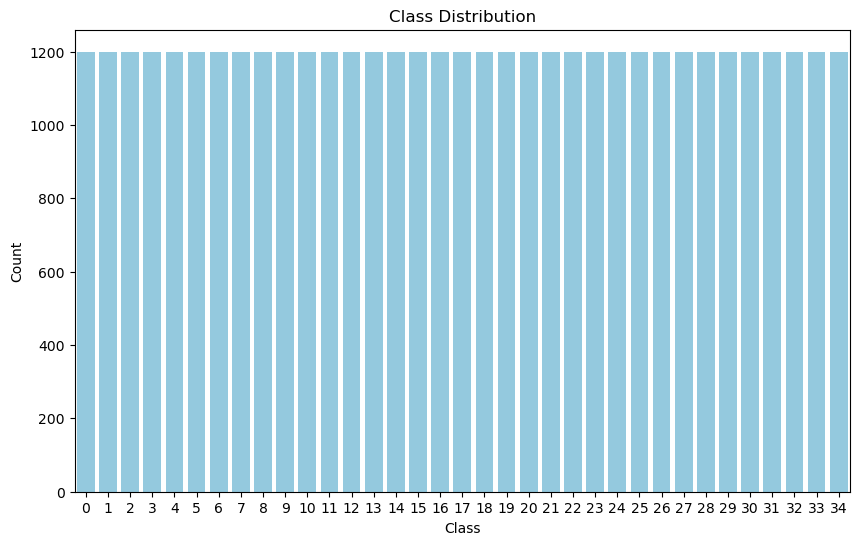

In [5]:
import os
import shutil
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

# Define paths
source_dir = "IndianSignLanguage/data"
target_dir = "IndianSignLanguage_processed"

if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Define classes to keep
classes_to_keep = os.listdir(source_dir)

# Copy images of selected classes to the target directory
for class_name in classes_to_keep:
    src_path = os.path.join(source_dir, class_name)
    dst_path = os.path.join(target_dir, class_name)
    try:
        shutil.copytree(src_path, dst_path)
    except FileExistsError:
        print(f"Directory '{dst_path}' already exists. Skipping copying.")

# Dataset Paths
data_dir = target_dir

# Extract metadata
# Exploratory Analysis
print("Exploratory Analysis:")
metadata_df, class_distribution = extract_metadata(data_dir)

# Image transformations with data augmentation
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset with augmented transform
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Convert to DataFrame
df = pd.DataFrame(dataset.imgs, columns=['image_path', 'label'])

# Distribution Graphs
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


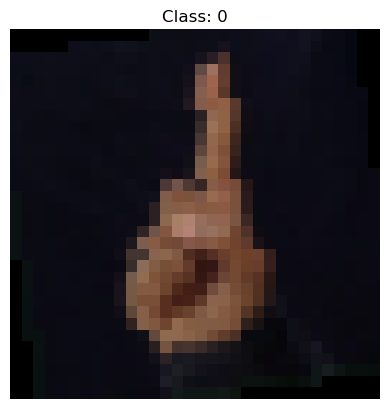

In [7]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),  # Random vertical flip
    transforms.RandomRotation(10),  # Random rotation within ±10 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset 
data_dir = 'IndianSignLanguage_processed'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Select a random image from the dataset
img, label = dataset[2] 

# Convert tensor to numpy
img = img.numpy().transpose((1, 2, 0))  # Convert to HWC format
img = img * 0.5 + 0.5

# Plot the image
plt.imshow(img)
plt.title(f'Class: {label}')
plt.axis('off')
plt.show()


In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import pandas as pd
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [11]:
# torch.manual_seed(42)
# Split dataset into train and test
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [13]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# from sklearn.metrics import roc_curve, auc
import torch
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Suppress the warning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Function to evaluate the model
def evaluate_model(model, test_loader, device):
    model.eval()  
    all_preds = []
    all_labels = []
    with torch.no_grad():  # Disable gradient calculation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get the predictions

            
            all_preds.extend(predicted.cpu().numpy())  # Move predictions to CPU for storing
            all_labels.extend(labels.cpu().numpy())  # Move labels to CPU for storing

    # Calculate evaluation metrics
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division='warn')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    accuracy = accuracy_score(all_labels, all_preds)

    return accuracy, f1, recall, precision




In [15]:
# Lists to store training loss and metrics
training_loss_arr = [[] for _ in range(3)]  # Store loss for each dataset
accuracy_arr = [[] for _ in range(3)]  # Store accuracy for each dataset
f1_arr = [[] for _ in range(3)]  # Store F1 score for each dataset
recall_arr = [[] for _ in range(3)]  # Store recall for each dataset
precision_arr = [[] for _ in range(3)]  # Store precision for each dataset
# roc = [[] for _ in range(3)]  # Store roc for each dataset
epocs =10
train_loaders_arr = [0, 1, 2]

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Initialize the model using prebuilt ResNet18
net = models.resnet18(pretrained=False)  
net.fc = nn.Linear(net.fc.in_features, 35)

# Define the device - GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device (GPU or CPU)
net = net.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Number of epochs and lists to store metrics
num_epochs = 10
accuracy_arr, f1_arr, recall_arr, precision_arr = [[]], [[]], [[]], [[]]

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

       
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()
        if i % 100 == 99:  # Print loss every 100 mini-batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

    # Evaluate model on test data after each epoch
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.3f}")
    acc, f1_val, recall_val, precision_val = evaluate_model(net, test_loader,device)  # Assuming test_loader is defined

    # Save metrics
    accuracy_arr[0].append(acc)
    f1_arr[0].append(f1_val)
    recall_arr[0].append(recall_val)
    precision_arr[0].append(precision_val)

# Print metrics
print("Accuracy:", accuracy_arr)
print("F1 Score:", f1_arr)
print("Recall:", recall_arr)
print("Precision:", precision_arr)

print("Finished Training")



/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[1, 100] loss: 0.373
[1, 200] loss: 0.077
[1, 300] loss: 0.046
[1, 400] loss: 0.040
Epoch 1, Loss: 0.001
[2, 100] loss: 4.233
[2, 200] loss: 1.566
[2, 300] loss: 0.677
[2, 400] loss: 0.354
Epoch 2, Loss: 0.033
[3, 100] loss: 0.173
[3, 200] loss: 0.202
[3, 300] loss: 0.143
[3, 400] loss: 0.093
Epoch 3, Loss: 0.011
[4, 100] loss: 0.092
[4, 200] loss: 0.047
[4, 300] loss: 0.051
[4, 400] loss: 0.103
Epoch 4, Loss: 0.003
[5, 100] loss: 0.042
[5, 200] loss: 0.043
[5, 300] loss: 0.054
[5, 400] loss: 0.032
Epoch 5, Loss: 0.005
[6, 100] loss: 0.011
[6, 200] loss: 0.043
[6, 300] loss: 0.028
[6, 400] loss: 0.023
Epoch 6, Loss: 0.002
[7, 100] loss: 0.046
[7, 200] loss: 0.031
[7, 300] loss: 0.021
[7, 400] loss: 0.009
Epoch 7, Loss: 0.004
[8, 100] loss: 0.032
[8, 200] loss: 0.036
[8, 300] loss: 0.027
[8, 400] loss: 0.019
Epoch 8, Loss: 0.002
[9, 100] loss: 0.005
[9, 200] loss: 0.007
[9, 300] loss: 0.004
[9, 400] loss: 0.033
Epoch 9, Loss: 0.002
[10, 100] loss: 0.009
[10, 200] loss: 0.012
[10, 300] l

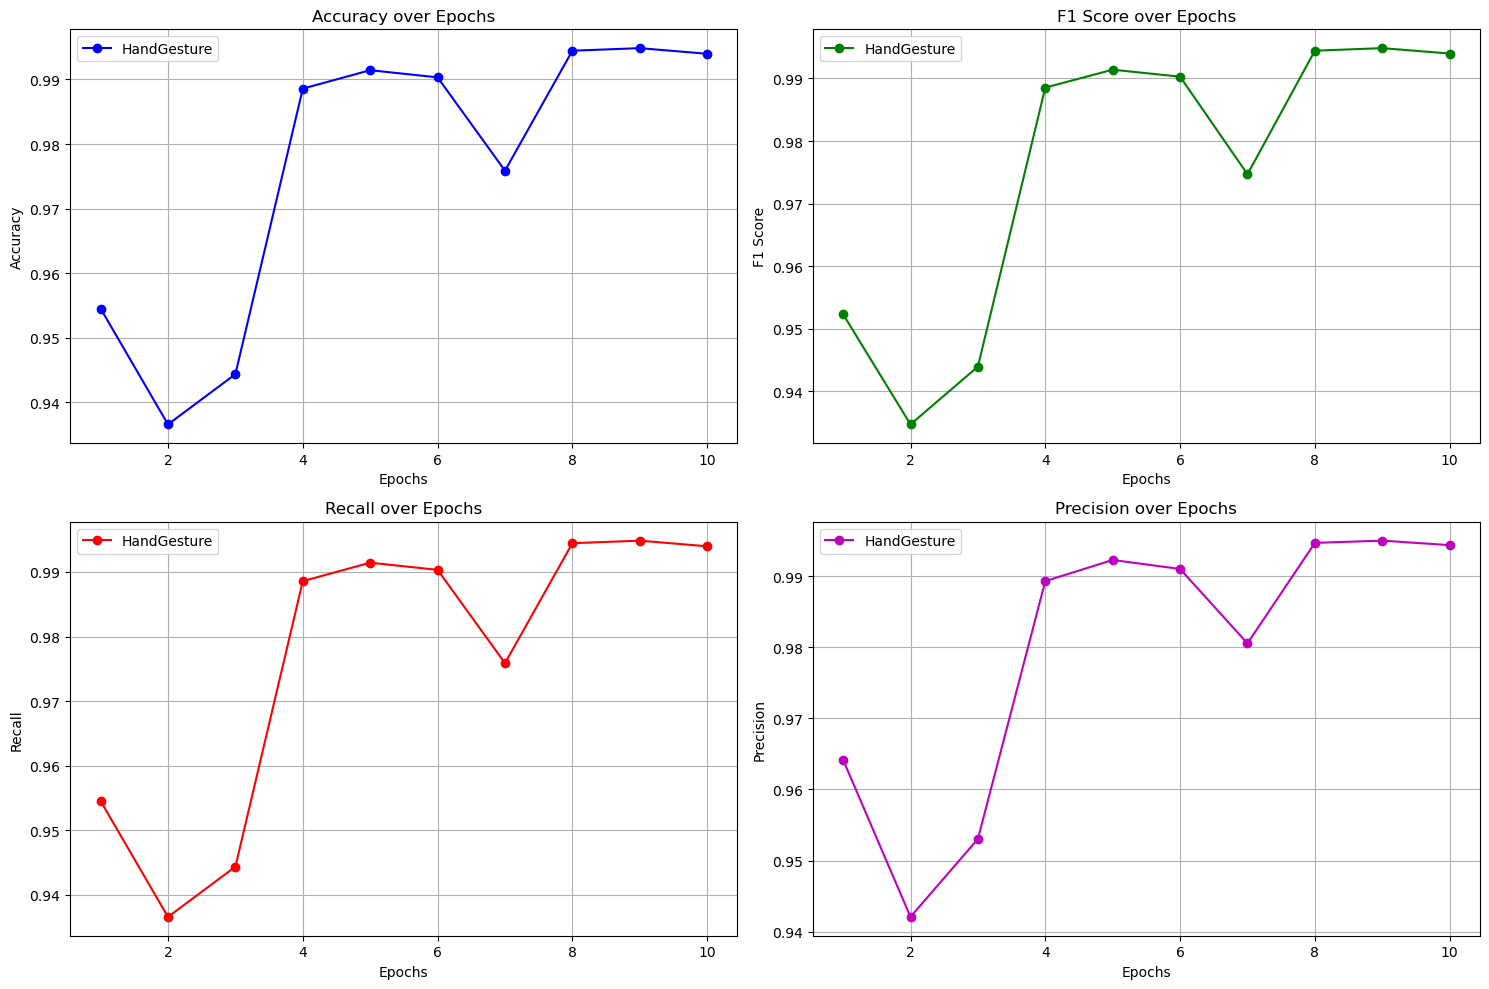

In [19]:
import matplotlib.pyplot as plt

# Define the number of epochs
epochs = range(1, 11)

# Plotting function for a single dataset
def my_plot(epochs, accuracy_arr, f1_arr, recall_arr, precision_arr, label):
    plt.figure(figsize=(15, 10))

    # Plot Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(epochs, accuracy_arr, label='HandGesture', marker='o', color='b')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot F1 Score
    plt.subplot(2, 2, 2)
    plt.plot(epochs, f1_arr, label='HandGesture', marker='o', color='g')
    plt.title('F1 Score over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)

    # Plot Recall
    plt.subplot(2, 2, 3)
    plt.plot(epochs, recall_arr, label='HandGesture', marker='o', color='r')
    plt.title('Recall over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.grid(True)

    # Plot Precision
    plt.subplot(2, 2, 4)
    plt.plot(epochs, precision_arr, label='HandGesture', marker='o', color='m')
    plt.title('Precision over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

my_plot(epochs, accuracy_arr[0], f1_arr[0], recall_arr[0], precision_arr[0], 'HandGesture')


In [21]:
import requests
import zipfile
import os


url = 'https://www.dropbox.com/scl/fi/7o8eil59unj7vsxws6zgo/Sign-Language-Digits-Dataset-master-1.zip?rlkey=l3hrprqn03ts03ulbth2216w0&st=c1k4gdpw&dl=1'


response = requests.get(url)

if response.status_code == 200:
    zip_path = 'Sign-Language-Digits-Dataset-master.zip'

    with open(zip_path, 'wb') as f:
        f.write(response.content)

    print("Dataset downloaded successfully.")

    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.testzip()  
            zip_ref.extractall('Sign-Language-Digits-Dataset-master')
            print("Dataset extracted successfully.")
    except zipfile.BadZipFile:
        print("Error: The file is not a valid zip file.")
else:
    print(f"Error downloading the dataset. Status code: {response.status_code}")


Dataset downloaded successfully.
Dataset extracted successfully.


Metadata Summary:
Total number of images: 2062
Number of classes: 10
Class distribution:
  ClassID  NumImages
0       9        204
1       0        205
2       7        206
3       6        207
4       1        206
5       8        208
6       4        207
7       3        206
8       2        206
9       5        207



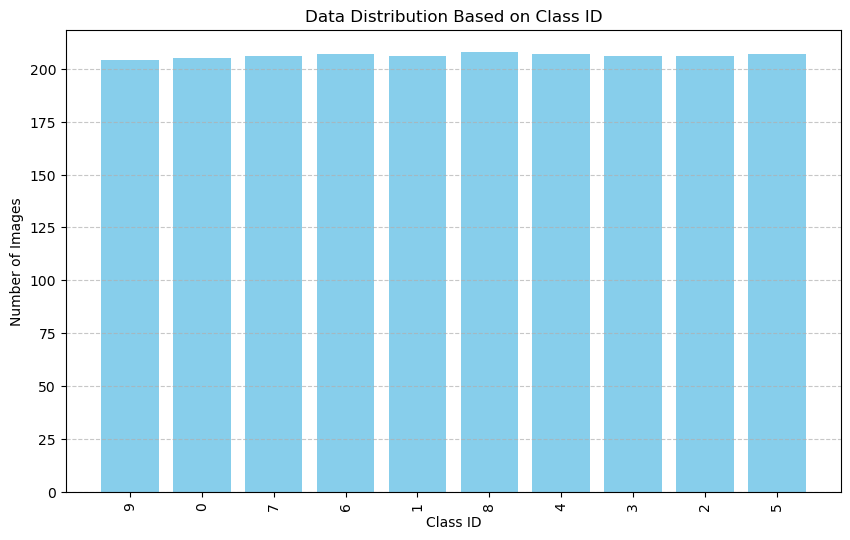

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt


def extract_metadata(dataset_path):
    data = []
    class_distribution = {}

    
    for class_dir in os.listdir(dataset_path):
        
        if class_dir.startswith('.'):
            continue

        
        class_id = class_dir
        class_images = os.listdir(os.path.join(dataset_path, class_dir))

        
        class_distribution[class_id] = len(class_images)
        data.append((class_id, len(class_images)))

    
    df = pd.DataFrame(data, columns=['ClassID', 'NumImages'])

    
    total_images = df['NumImages'].sum()

    
    print("Metadata Summary:")
    print("=================")
    print("Total number of images:", total_images)
    print("Number of classes:", len(df))
    print("Class distribution:")
    print(df)
    print("")

    return df, class_distribution

dataset_path = "Sign-Language-Digits-Dataset-master/Sign-Language-Digits-Dataset-master/Dataset"

# Extract metadata
metadata_df, class_distribution = extract_metadata(dataset_path)

# Plot the data distribution based on class ID
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Data Distribution Based on Class ID')
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Exploratory Analysis:
Metadata Summary:
Total number of images: 2062
Number of classes: 10
Class distribution:
  ClassID  NumImages
0       9        204
1       0        205
2       7        206
3       6        207
4       1        206
5       8        208
6       4        207
7       3        206
8       2        206
9       5        207



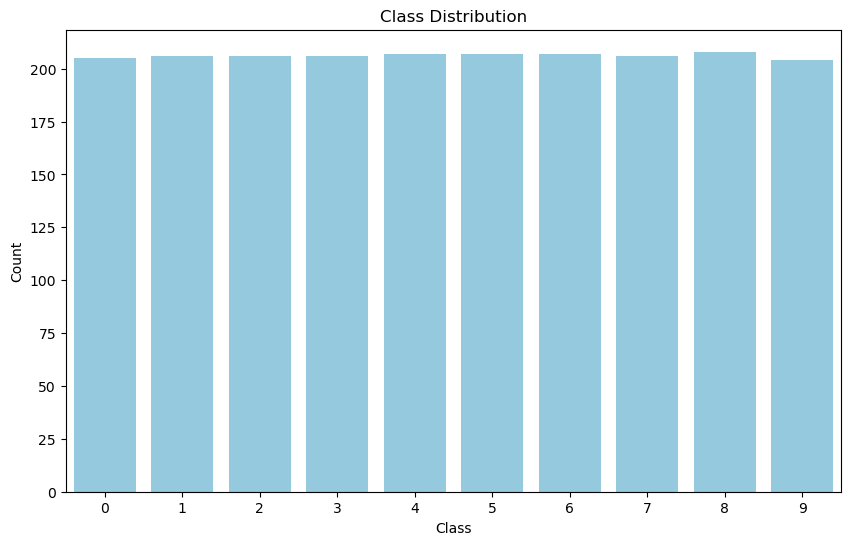

In [25]:
import os
import shutil
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms


source_dir = "Sign-Language-Digits-Dataset-master/Sign-Language-Digits-Dataset-master/Dataset"
target_dir = "Sign-Language-Digits-Dataset-master_processed"


if not os.path.exists(target_dir):
    os.makedirs(target_dir)


classes_to_keep = os.listdir(source_dir)  


for class_name in classes_to_keep:
    src_path = os.path.join(source_dir, class_name)
    dst_path = os.path.join(target_dir, class_name)
    try:
        shutil.copytree(src_path, dst_path)
    except FileExistsError:
        print(f"Directory '{dst_path}' already exists. Skipping copying.")

data_dir = target_dir

# Extract metadata
# Exploratory Analysis
print("Exploratory Analysis:")
metadata_df, class_distribution = extract_metadata(data_dir)

# Image transformations with data augmentation
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomVerticalFlip(),
    # transforms.RandomRotation(10),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset with augmented transform
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Convert to DataFrame
df = pd.DataFrame(dataset.imgs, columns=['image_path', 'label'])

# Distribution Graphs
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [27]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import pandas as pd
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [29]:

train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [31]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# from sklearn.metrics import roc_curve, auc
import torch
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Suppress the warning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Function to evaluate the model
def evaluate_model(model, test_loader, device):
    model.eval()  
    all_preds = []
    all_labels = []
    with torch.no_grad():  
        for images, labels in test_loader:
            
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  

           
            all_preds.extend(predicted.cpu().numpy())  # Move predictions to CPU for storing
            all_labels.extend(labels.cpu().numpy())  # Move labels to CPU for storing

    # Calculate evaluation metrics
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division='warn')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    accuracy = accuracy_score(all_labels, all_preds)

    return accuracy, f1, recall, precision

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


net = models.resnet18(pretrained=False)  # Load ResNet18 with pretrained weights
net.fc = nn.Linear(net.fc.in_features, 10)  

# Define the device - GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device (GPU or CPU)
net = net.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Number of epochs and lists to store metrics
num_epochs = 10
accuracy_arr, f1_arr, recall_arr, precision_arr = [[]], [[]], [[]], [[]]

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  
        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()
        if i % 100 == 99:  # Print loss every 100 mini-batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

    
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.3f}")
    acc, f1_val, recall_val, precision_val = evaluate_model(net, test_loader,device) 

    # Save metrics
    accuracy_arr[0].append(acc)
    f1_arr[0].append(f1_val)
    recall_arr[0].append(recall_val)
    precision_arr[0].append(precision_val)

# Print metrics
print("Accuracy:", accuracy_arr)
print("F1 Score:", f1_arr)
print("Recall:", recall_arr)
print("Precision:", precision_arr)

print("Finished Training")



/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 0.969
Epoch 2, Loss: 3.133
Epoch 3, Loss: 1.357
Epoch 4, Loss: 0.624
Epoch 5, Loss: 0.338
Epoch 6, Loss: 0.180
Epoch 7, Loss: 0.134
Epoch 8, Loss: 0.107
Epoch 9, Loss: 0.098
Epoch 10, Loss: 0.110
Accuracy: [[0.23909531502423265, 0.37479806138933763, 0.6720516962843296, 0.8659127625201939, 0.901453957996769, 0.8820678513731826, 0.9289176090468497, 0.9289176090468497, 0.901453957996769, 0.9337641357027464]]
F1 Score: [[0.1466819049114232, 0.32461622328167933, 0.6481126783310536, 0.8650489506195109, 0.9010347993906674, 0.8820014701625674, 0.9291454313843026, 0.9295970882234166, 0.9008906495738203, 0.9329717592561835]]
Recall: [[0.23909531502423265, 0.37479806138933763, 0.6720516962843296, 0.8659127625201939, 0.901453957996769, 0.8820678513731826, 0.9289176090468497, 0.9289176090468497, 0.901453957996769, 0.9337641357027464]]
Precision: [[0.22854780701580016, 0.3563262271830697, 0.749487787128383, 0.8760151983905841, 0.9072369831761674, 0.8930768790181943, 0.933205571816991,